# Importing the libraries

In [22]:
from numpy.core.fromnumeric import mean
import pandas as pd #dataframe
import numpy as np#dataframe
import matplotlib.pyplot as plt
import seaborn as sns

# Importing the data
The data was taken from https://transparencia.unicamp.br/paginas/consultar-salarios-do-mes-atual/
A site made by UNICAMP university with the idea of giving better transparency to the public founds expendures.

In [23]:
data_original = pd.read_csv('consultar-salarios.csv',sep=';')
data = data_original.drop_duplicates()[0:2000]

# Data cleaning and manipulating
## Money columns cleaning
Here we clean some columns changing the money columns from "R$ 1000,00" to a numerical "1000.00".

In [24]:
data['Salário Bruto Nominal'] = data['Salário Bruto Nominal'].str.replace('.','')
data['Salário Bruto Nominal'] = data['Salário Bruto Nominal'].str.replace(',','.')
data['Salário Bruto Nominal'] = data['Salário Bruto Nominal'].str[3:]

data['Indenizações'] = data['Indenizações'].str.replace('.','')
data['Indenizações'] = data['Indenizações'].str.replace(',','.')
data['Indenizações'] = data['Indenizações'].str[3:]

data['Redutor'] = data['Redutor'].str.replace('.','')
data['Redutor'] = data['Redutor'].str.replace(',','.')
data['Redutor'] = data['Redutor'].str[3:]

data['Descontos'] = data['Descontos'].str.replace('.','')
data['Descontos'] = data['Descontos'].str.replace(',','.')
data['Descontos'] = data['Descontos'].str[3:]

data['Líquido'] = data['Líquido'].str.replace('.','')
data['Líquido'] = data['Líquido'].str.replace(',','.')
data['Líquido'] = data['Líquido'].str[3:]

data['Férias e 13o Salário'] = data['Férias e 13o Salário'].str.replace('.','')
data['Férias e 13o Salário'] = data['Férias e 13o Salário'].str.replace(',','.')
data['Férias e 13o Salário'] = data['Férias e 13o Salário'].str[3:]

data['Salário Bruto Efetivo'] = data['Salário Bruto Efetivo'].str.replace('.','')
data['Salário Bruto Efetivo'] = data['Salário Bruto Efetivo'].str.replace(',','.')
data['Salário Bruto Efetivo'] = data['Salário Bruto Efetivo'].str[3:]

In [25]:
data["Salário Bruto Nominal"] = pd.to_numeric(data["Salário Bruto Nominal"])
data["Indenizações"] = pd.to_numeric(data["Indenizações"])
data["Redutor"] = pd.to_numeric(data["Redutor"])
data["Descontos"] = pd.to_numeric(data["Descontos"])
data["Líquido"] = pd.to_numeric(data["Líquido"])
data["Férias e 13o Salário"] = pd.to_numeric(data["Férias e 13o Salário"])
data["Salário Bruto Efetivo"] = pd.to_numeric(data["Salário Bruto Efetivo"])
#data.dtypes

## Ocupation column
Here we split the occupation ('Cargo') into general and specific names ('Cargo1' and 'Cargo2', respectively).

In [26]:
data[['Cargo1','Cargo2']] = data['Cargo'].str.split(pat=' / ',expand=True)
for i in range(0,data['Cargo'].size):
    if (data['Cargo2'].loc[i] is None): 
        data['Cargo2'].loc[i]=data['Cargo1'].loc[i]
        data['Cargo1'].loc[i]=None

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


## Spliting the department categories
Here we split the destiny of each salary into categories and sub-categories. So we can see were and how much is being spend in each department/college

In [37]:
#split the column in each category and sub-category
df = data['Lotação'].str.split(pat='/', expand=True) 
df.columns = ['cat_1','cat_2','cat_3','cat_4','cat_5','cat_6','cat_7'] #change every expenditure category column name
df.insert(loc=0, column='cat_0',value=None)
df[['cat_0','cat_1']] = df['cat_1'].str.split(pat=' ', expand=True,n=1)
df['Salário Bruto Nominal'] = pd.to_numeric(data['Salário Bruto Nominal']) #convert to numeric

df.fillna('EMPTY')

,cat_0,cat_1,cat_2,cat_3,cat_4,cat_5,cat_6,cat_7,Salário Bruto Nominal
0,01.14.16.04,REITORIA,PREFEITURA GABINETE,COORDENADORIA DE INFRAESTRUTURA,DIVISAO DE MEIO-AMBIENTE,EMPTY,EMPTY,EMPTY,10186.69
1,10.10,"INSTITUTO DE MATEMATICA, ESTATISTICA E COMPUTA...",COORDENADORIA ADMINISTRATIVA,EMPTY,EMPTY,EMPTY,EMPTY,EMPTY,7360.50
2,01.12.12,REITORIA,DIRETORIA GERAL DE ADMINISTRACAO,SUPRIMENTOS,EMPTY,EMPTY,EMPTY,EMPTY,4250.66
3,27.09.15.02,HOSPITAL DA MULHER PROF.DR.JOSE ARISTODEMO PIN...,DIVISAO DE APOIO A ASSISTENCIA E A PESQUISA,DIRETORIA DO SERVICO DE SERVICO SOCIAL,SECAO DE APOIO SOCIAL,EMPTY,EMPTY,EMPTY,2659.49
4,26,INSTITUTO DE ECONOMIA,EMPTY,EMPTY,EMPTY,EMPTY,EMPTY,EMPTY,11739.72
...,...,...,...,...,...,...,...,...,...
1995,01.02,REITORIA,COORDENADORIA GERAL DA UNIVERSIDADE,EMPTY,EMPTY,EMPTY,EMPTY,EMPTY,29133.99
1996,20.01,CENTRO DE COMPUTACAO,ASSESSORIA DE PLANEJAMENTO E PROJETOS ESPECIAIS,EMPTY,EMPTY,EMPTY,EMPTY,EMPTY,19824.27
1997,13,COLEGIO TECNICO DE LIMEIRA,EMPTY,EMPTY,EMPTY,EMPTY,EMPTY,EMPTY,18182.50
1998,15,HOSPITAL DE CLINICAS,EMPTY,EMPTY,EMPTY,EMPTY,EMPTY,EMPTY,4786.90


# Plotting the data
## Salaries distributions
Here we se the distribution and a box plot of all the raw monthly salaries ('Salario Bruto Nominal') along with the median and average.
We can see a peak around R\$10,000 but with a long tail going up to R\$70,000. In Brazil the minimun wage is R\$ 1,100 per month since 01/2021.

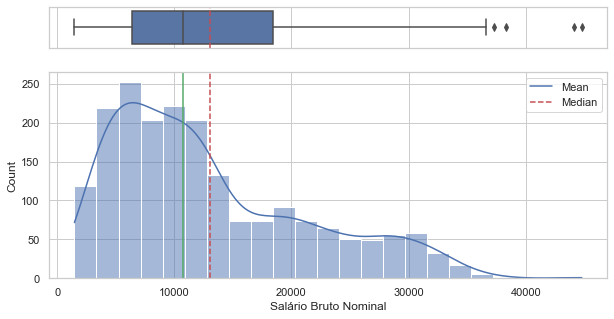

<Figure size 432x288 with 0 Axes>

In [38]:
f,(ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw= {"height_ratios": (0.2, 1)}, figsize=(10,5))

mean=data['Salário Bruto Nominal'].mean()
median=data['Salário Bruto Nominal'].median()

sns.boxplot(x=data['Salário Bruto Nominal'], ax=ax_box)
ax_box.axvline(mean, color='r', linestyle='--')

sns.histplot(data=data['Salário Bruto Nominal'],ax=ax_hist,kde=True)
ax_hist.axvline(mean, color='r', linestyle='--')
ax_hist.axvline(median, color='g', linestyle='-')

plt.legend({'Mean':mean,'Median':median})

ax_box.set(xlabel='')
plt.show()

plt.savefig("Figures/salaries.jpeg")

## Plotting the 10 biggest expenses in salaries
Here we plot the total sum of salaries by category (that we separated in the data cleaning part).
The graph is side-by-side with the median and count dor each horizontal bar.
We can see how the 'Reitoria'(Rectory) have the biggest expenses but also one of the biggest count of salaries.
The 'Hospital de clinicas'(Clinical hospital) and the 'Faculdade de ciências médicas'(Medical school) follow a similar paths. That might mean that they have a lot of employees but with not a big wage, with could be a problem of too many or unecessary employess or simply the department characterist, since a hospital needs a lot of people and the administratives task of the Rectory might also need a lot of people.

[Text(0.5, 0, 'Count')]

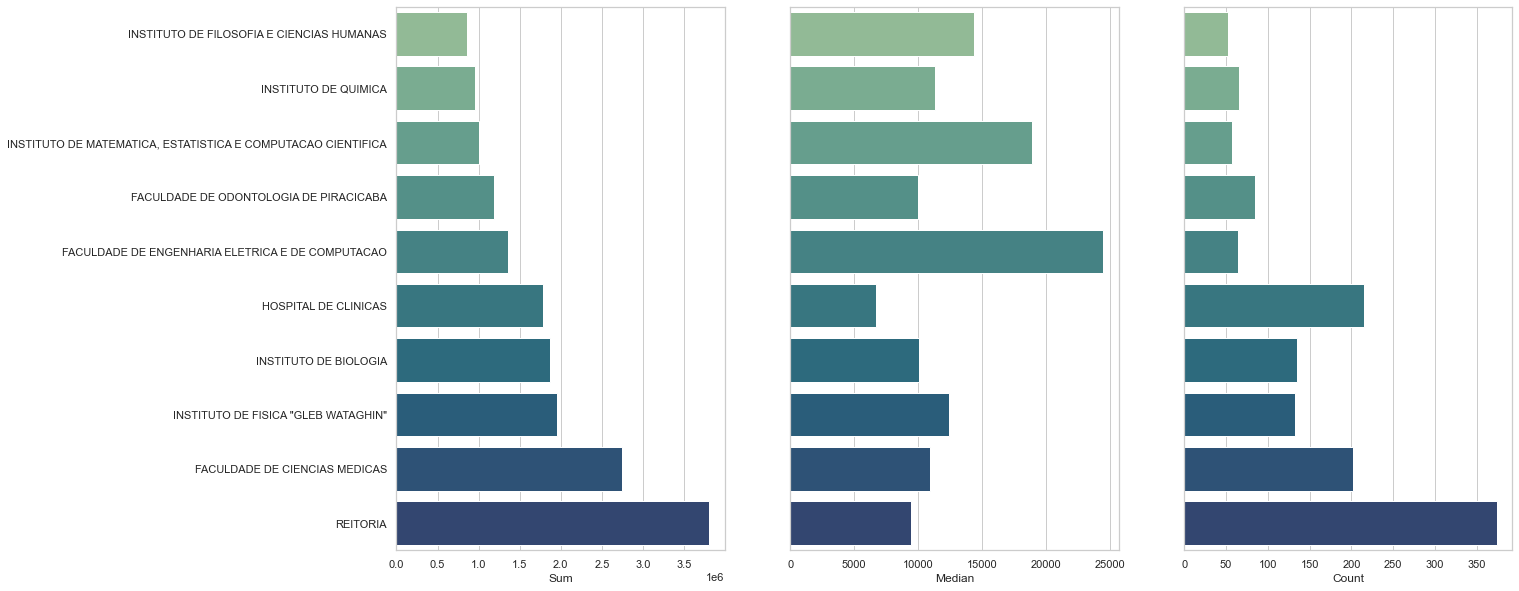

In [39]:
sns.set_theme(style="whitegrid")
fig, axs = plt.subplots(1,3,sharey=True, figsize=(20,10))

df1 = df.groupby('cat_1').sum().sort_values('Salário Bruto Nominal').reset_index()
df2 = df.groupby('cat_1').median().reset_index()
df3 = df.groupby('cat_1').count().reset_index()


fig1 = sns.barplot(x='Salário Bruto Nominal', y='cat_1', data=df1, order=df1['cat_1'][-10:], palette='crest', ax=axs[0])
fig2 = sns.barplot(x='Salário Bruto Nominal', y='cat_1', data=df2, order=df1['cat_1'][-10:], palette='crest', ax=axs[1])
fig3 = sns.barplot(x='Salário Bruto Nominal', y='cat_1', data=df3, order=df1['cat_1'][-10:], palette='crest', ax=axs[2])

fig1.set(ylabel='')
fig2.set(ylabel='')
fig3.set(ylabel='')

fig1.set(xlabel='Sum')
fig2.set(xlabel='Median')
fig3.set(xlabel='Count')

## Analysing deeper
We'll plot the distribution of each department mentioned before and see how each is behaving.
### 'Reitoria'(Rectory)
Here we plot the distribution of the 'Reitoria'(Rectory) and we can see how it follows a similar shape as the whole university wage distribution.

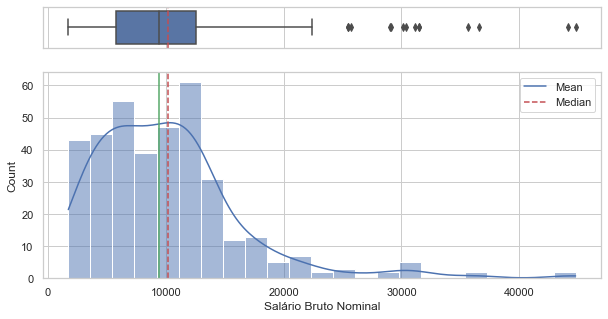

In [30]:
df_median = df.loc[(df['cat_1']=='REITORIA')]
df_hue = df_median['cat_1']

f,(ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw= {"height_ratios": (0.2, 1)}, figsize=(10,5))

mean=df_median['Salário Bruto Nominal'].mean()
median=df_median['Salário Bruto Nominal'].median()

sns.boxplot(x=df_median['Salário Bruto Nominal'], ax=ax_box)
ax_box.axvline(mean, color='r', linestyle='--')

sns.histplot(data=df_median['Salário Bruto Nominal'],ax=ax_hist,kde=True)
ax_hist.axvline(mean, color='r', linestyle='--')
ax_hist.axvline(median, color='g', linestyle='-')

plt.legend({'Mean':mean,'Median':median})

ax_box.set(xlabel='')
plt.show()

### 'Faculdade de ciencias medicas'(Medical school)
Here we plot the Medical school distribution seeing a similar shape as the university distribution

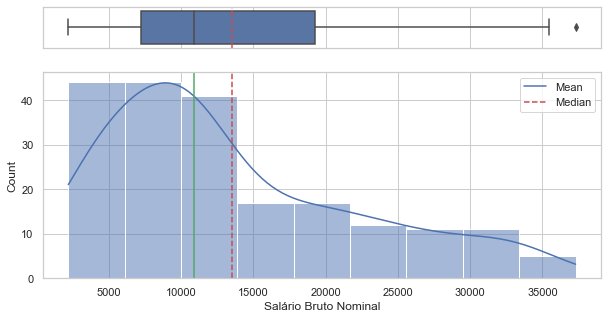

In [31]:
df_median = df.loc[(df['cat_1']=='FACULDADE DE CIENCIAS MEDICAS')]
df_hue = df_median['cat_1']

f,(ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw= {"height_ratios": (0.2, 1)}, figsize=(10,5))

mean=df_median['Salário Bruto Nominal'].mean()
median=df_median['Salário Bruto Nominal'].median()

sns.boxplot(x=df_median['Salário Bruto Nominal'], ax=ax_box)
ax_box.axvline(mean, color='r', linestyle='--')

sns.histplot(data=df_median['Salário Bruto Nominal'],ax=ax_hist,kde=True)
ax_hist.axvline(mean, color='r', linestyle='--')
ax_hist.axvline(median, color='g', linestyle='-')

plt.legend({'Mean':mean,'Median':median})

ax_box.set(xlabel='')
plt.show()

### 'Hospital de clinicas'(Clinical hospital)
We repeat the same distribution seeing similar results.

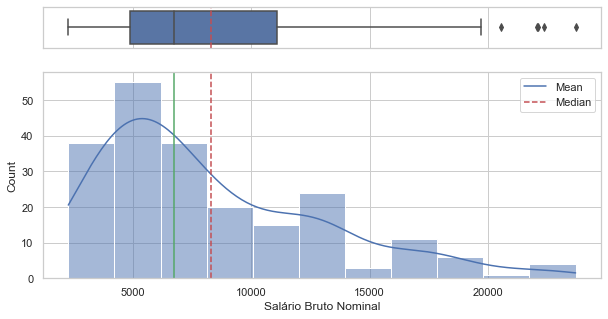

In [32]:
df_median = df.loc[(df['cat_1']=='HOSPITAL DE CLINICAS')]
df_hue = df_median['cat_1']

f,(ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw= {"height_ratios": (0.2, 1)}, figsize=(10,5))

mean=df_median['Salário Bruto Nominal'].mean()
median=df_median['Salário Bruto Nominal'].median()

sns.boxplot(x=df_median['Salário Bruto Nominal'], ax=ax_box)
ax_box.axvline(mean, color='r', linestyle='--')

sns.histplot(data=df_median['Salário Bruto Nominal'],ax=ax_hist,kde=True)
ax_hist.axvline(mean, color='r', linestyle='--')
ax_hist.axvline(median, color='g', linestyle='-')

plt.legend({'Mean':mean,'Median':median})

ax_box.set(xlabel='')
plt.show()

# Plotting the 10 biggest median salaries
Here we'll see what are the biggest median salaries. Median is a better representation of the salary since the distribution have a long tail and the mean wouldn't represent properly the "average worker".
We start by plotting the 10 biggest median salaries along with the total sum and count by department. We can see how all ten of then have similar salaries with small differences in the median salary. Also, all of them are colleges. Like, Architecture College, Education College, Engineer Schools and so on. 
That might relate to the fact that professors are associated with a College and they usually have the biggest wages, since they all have at least a Masters degree but usually a Masters and a Doctors degree, giving classes, doing research and sometimes have administratives tasks like college director or graduation coordinator.
The sum of salaries follows the total count of salaries, so we can conclude that all of them have similar patterns of bigger salaries.

[Text(0.5, 0, 'Count')]

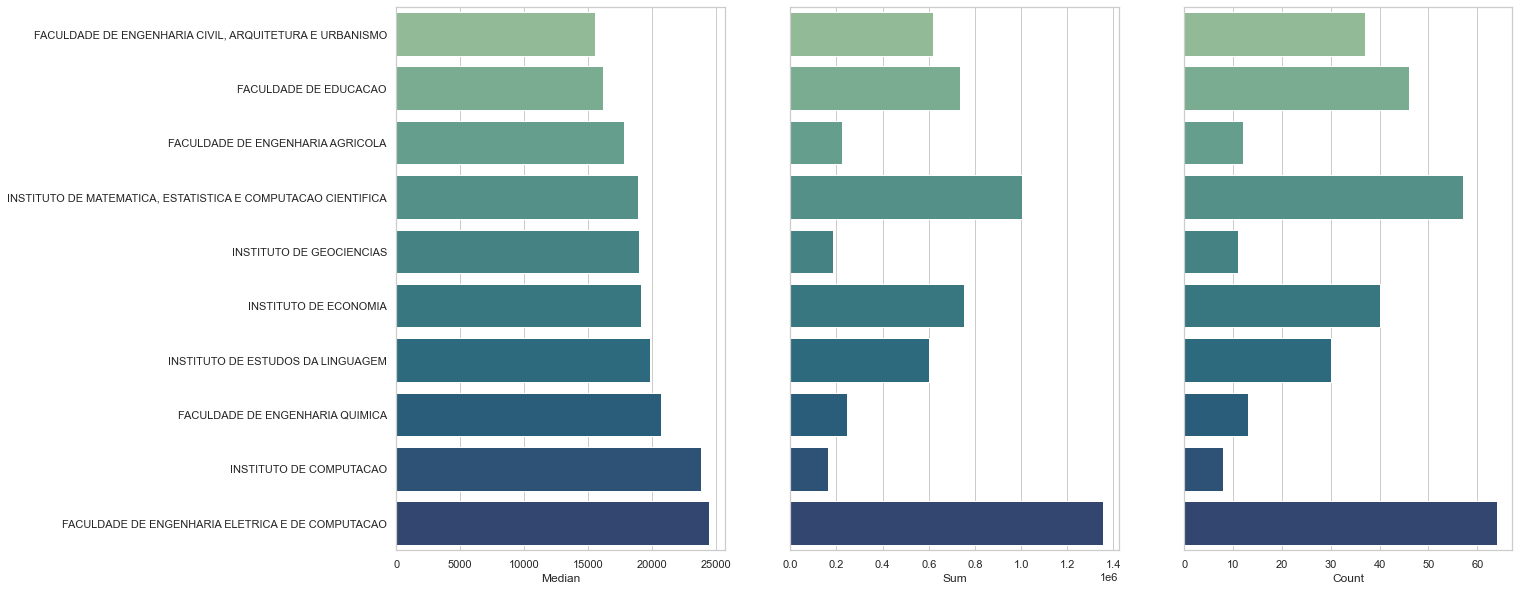

In [33]:
sns.set_theme(style="whitegrid")
fig, axs = plt.subplots(1,3,sharey=True, figsize=(20,10))

df1 = df.groupby('cat_1').median().sort_values('Salário Bruto Nominal').reset_index()
df2 = df.groupby('cat_1').sum().reset_index()
df3 = df.groupby('cat_1').count().reset_index()


fig1 = sns.barplot(x='Salário Bruto Nominal', y='cat_1', data=df1, order=df1['cat_1'][-10:], palette='crest', ax=axs[0])
fig2 = sns.barplot(x='Salário Bruto Nominal', y='cat_1', data=df2, order=df1['cat_1'][-10:], palette='crest', ax=axs[1])
fig3 = sns.barplot(x='Salário Bruto Nominal', y='cat_1', data=df3, order=df1['cat_1'][-10:], palette='crest', ax=axs[2])

fig1.set(ylabel='')
fig2.set(ylabel='')
fig3.set(ylabel='')

fig1.set(xlabel='Median')
fig2.set(xlabel='Sum')
fig3.set(xlabel='Count')

## 'Faculdade de engenharia eletrica e de computação'(Electrical and computation engineer school)
Here we explore more the biggest median salary of all of them. The 'Faculdade de engenharia eletrica e de computacao' (Electrical and computation engineer school).
### Analysing deeper
We can se the result we predicted before, bigger salaries with a higher median and mean than the university.

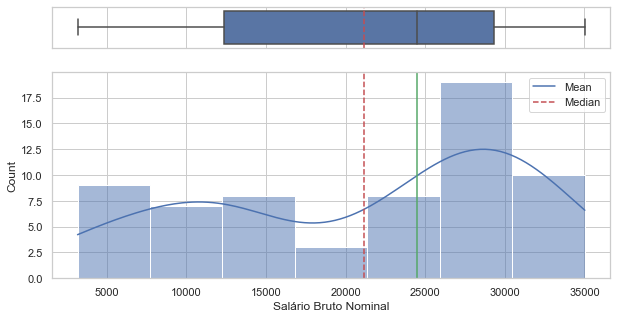

In [34]:
df_median = df.loc[(df['cat_1']=='FACULDADE DE ENGENHARIA ELETRICA E DE COMPUTACAO')]
df_hue = df_median['cat_1']

f,(ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw= {"height_ratios": (0.2, 1)}, figsize=(10,5))

mean=df_median['Salário Bruto Nominal'].mean()
median=df_median['Salário Bruto Nominal'].median()

sns.boxplot(x=df_median['Salário Bruto Nominal'], ax=ax_box)
ax_box.axvline(mean, color='r', linestyle='--')

sns.histplot(data=df_median['Salário Bruto Nominal'],ax=ax_hist,kde=True)
ax_hist.axvline(mean, color='r', linestyle='--')
ax_hist.axvline(median, color='g', linestyle='-')

plt.legend({'Mean':mean,'Median':median})

ax_box.set(xlabel='')
plt.show()

### Exploring by sub-deparment
Here we try to see how the salaries are distributed by sub-department.

<AxesSubplot:xlabel='Salário Bruto Nominal', ylabel='cat_2'>

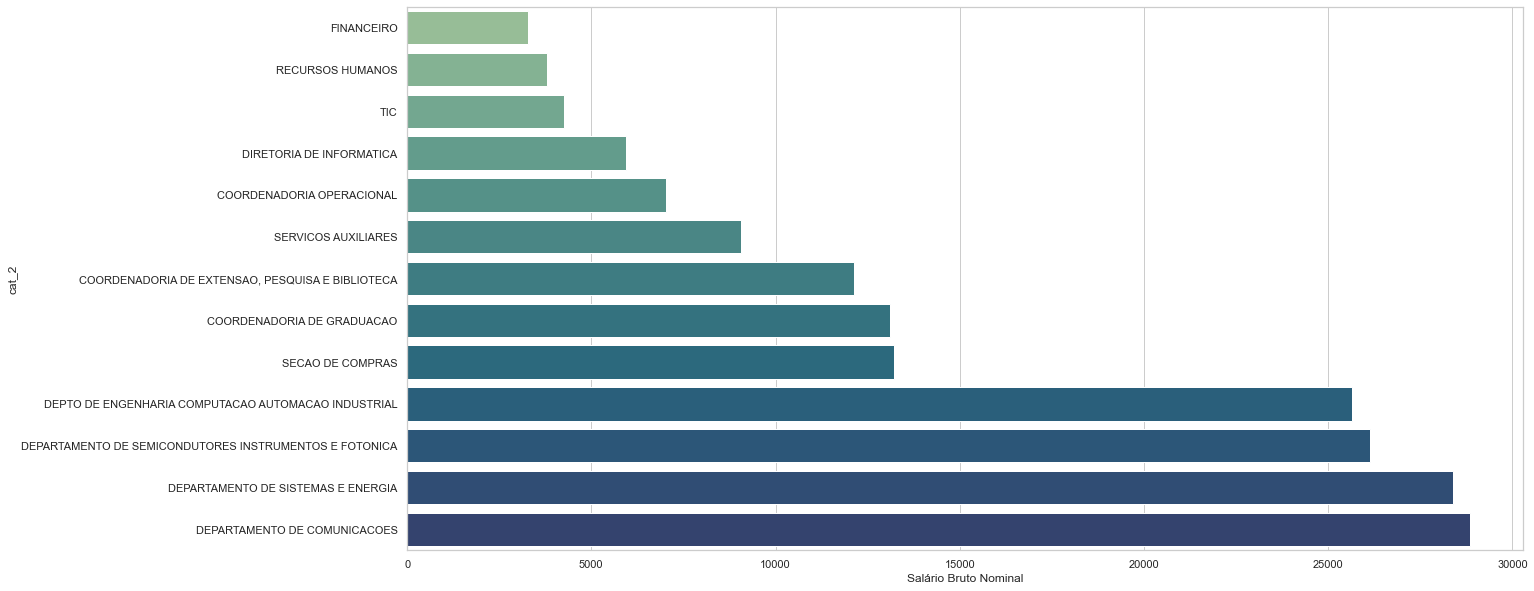

In [40]:
sns.set_theme(style="whitegrid")
plt.subplots(figsize=(20,10))

df_median = df.loc[(df['cat_1']=='FACULDADE DE ENGENHARIA ELETRICA E DE COMPUTACAO')]
df1 = df_median.groupby('cat_2').median().sort_values('Salário Bruto Nominal').reset_index()
# df_median

sns.barplot(x='Salário Bruto Nominal', y='cat_2', data=df1, order=df1['cat_2'], palette='crest')

<AxesSubplot:xlabel='Salário Bruto Nominal', ylabel='cat_3'>

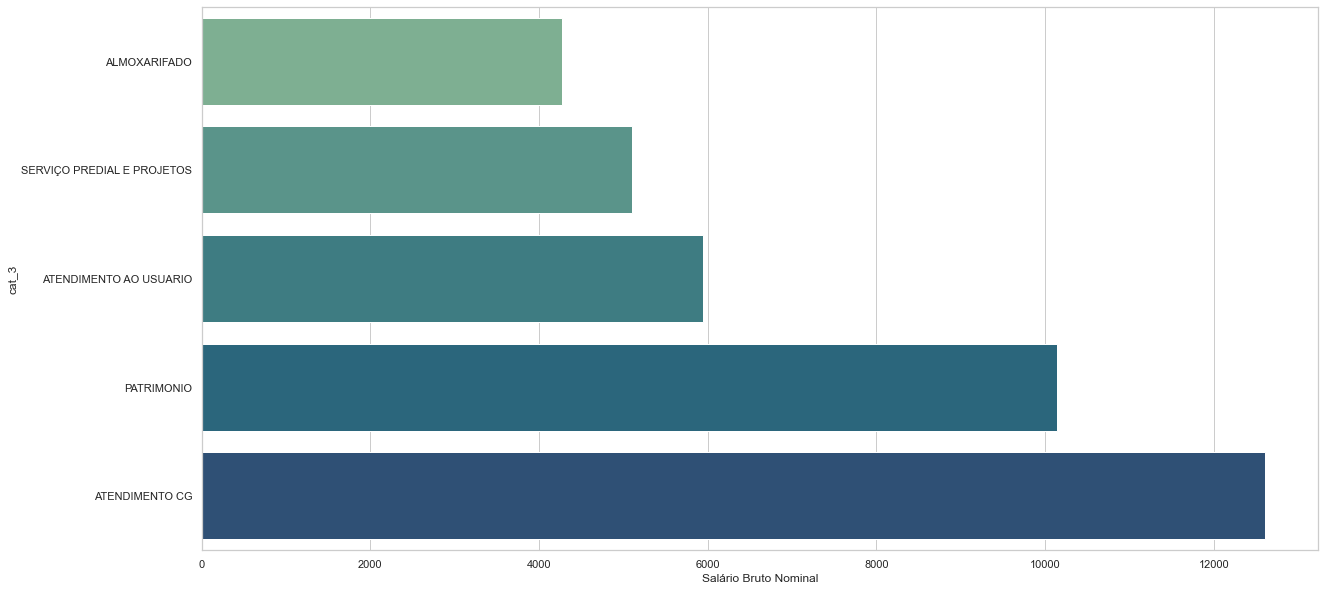

In [41]:
sns.set_theme(style="whitegrid")
plt.subplots(figsize=(20,10))

df_median = df.loc[(df['cat_1']=='FACULDADE DE ENGENHARIA ELETRICA E DE COMPUTACAO')]
df1 = df_median.groupby('cat_3').median().sort_values('Salário Bruto Nominal').reset_index()
# df_median

sns.barplot(x='Salário Bruto Nominal', y='cat_3', data=df1, order=df1['cat_3'], palette='crest')

In [ ]:
sns.set_theme(style="whitegrid")
plt.subplots(figsize=(20,10))

df_median = df.loc[(df['cat_1']=='FACULDADE DE ENGENHARIA ELETRICA E DE COMPUTACAO')]
df1 = df_median.groupby('cat_2').median().sort_values('Salário Bruto Nominal').reset_index()
# df_median

sns.barplot(x='Salário Bruto Nominal', y='cat_2', data=df1, order=df1['cat_2'], palette='crest')

In [42]:
df = data[['Cargo1','Salário Bruto Nominal']]

# df = df.sort_values(by=['Salário Bruto Nominal']).reset_index
result = df.groupby(['Cargo1'])['Salário Bruto Nominal'].aggregate(np.mean).reset_index().sort_values('Salário Bruto Nominal')

# g = sns.barplot(x='Cargo1',y='Salário Bruto Nominal',data=df, order=result['Cargo1'])
#g.set_xticklabels(g.get_xticklabels(), rotation=60, horizontalalignment='right')
#g.plot()
plt.subplots(figsize=(5, 10))
sns.barplot(y='Cargo1',x='Salário Bruto Nominal',data=df, order=result['Cargo1'],orient='h',palette='crest')

plt.savefig("Figures/salaries_category.jpeg")

KeyboardInterrupt: 

<AxesSubplot:xlabel='Salário Bruto Nominal', ylabel='Cargo2'>

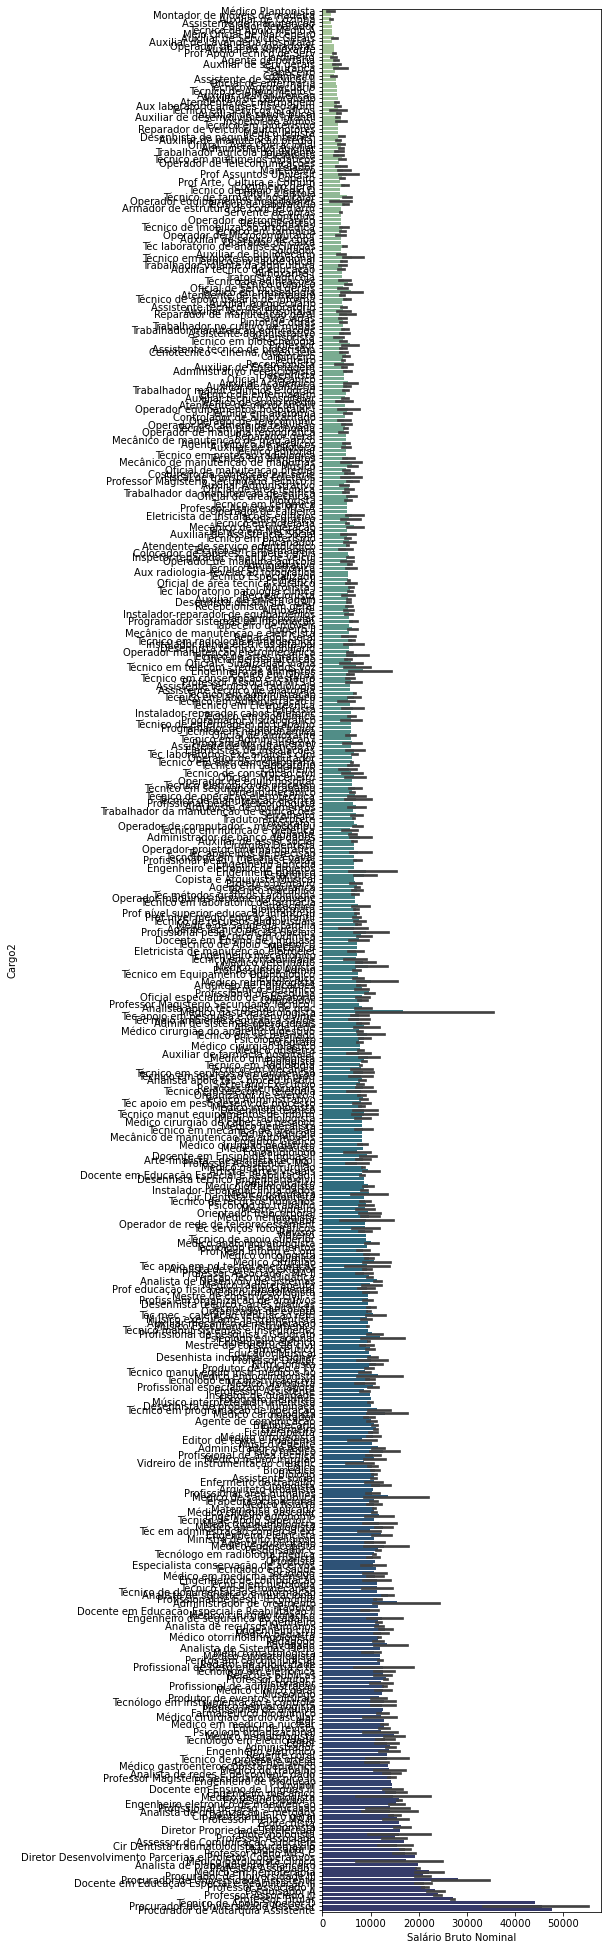

In [179]:
df = data[['Cargo2','Salário Bruto Nominal']]

result = df.groupby(['Cargo2'])['Salário Bruto Nominal'].aggregate(np.mean).reset_index().sort_values('Salário Bruto Nominal')

plt.subplots(figsize=(5, 35))
sns.barplot(y='Cargo2',x='Salário Bruto Nominal',data=df, order=result['Cargo2'],orient='h',palette='crest')

plt.savefig("Figures/salaries_all.jpeg")